In [36]:
# Exercise 1

# One-Max problem
# Find the sequence of binary genes whose sum is maximum
# (0) Randomly generate initial N individuals and their genes
# (1) Evaluate their fitness
# (2) (2) Copy the top elite to the next generation
# (3) Select superior two individuals (Tournament (Size 2))
# Randomly choose 2 individuals and select a better one -> Father
# Randomly choose 2 individuals and select a better one -> Mother
# (4) Produce offspring by crossover between the parents (Uniform)
# Exchange the gene between the parents with a probability of 0.5
# (5) Mutate the offspring

In [37]:
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt

# calculate score of each bit
def onemax(x):
    return -sum(x)

# tournament selection
def selection(pop, scores, k=3):
# first random selection
    selection_ix = randint(len(pop))
    for ix in randint(0, len(pop), k-1):
    # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

# crossover function
def crossover(p1, p2, cross_rate):
    c1, c2 = p1.copy(), p2.copy()
    # check if a mutation will happen
    if rand() < cross_rate:
        cross_pt = randint(1, len(p1)-2)
    # perform crossover
        c1 = p1[:cross_pt] + p2[cross_pt:]
        c2 = p2[:cross_pt] + p1[cross_pt:]
    return [c1, c2]

# mutation function
def mutation(bitstring, mutation_rate):
    for i in range(len(bitstring)):
        # check if a mutation will happen
        if rand() < mutation_rate:
        # flip the bit
            bitstring[i] = 1 - bitstring[i]
            
# genetic algorithm function
def genetic_algorithm(objective, n_bits, n_pop, n_iter, cross_rate, mutation_rate):
    pop = [randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    best, best_eval = 0, objective(pop[0])
    max_scores = []
    mean_scores = []
    for gen in range(n_iter):
        scores = [objective(c) for c in pop]
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen,  pop[i], scores[i]))
        selected = [selection(pop, scores) for _ in range(n_pop)]
        children = list()
        for i in range(0, n_pop, 2):
            p1, p2 = selected[i], selected[i+1]
            for c in crossover(p1, p2, cross_rate):
                mutation(c, mutation_rate)
                children.append(c)
        pop = children
        population_sum = sum(sum(x) for x in pop) 
        max_scores.append(max(sum(x) for x in pop))
        mean_scores.append(sum(sum(x) for x in pop)/n_pop)
    return best, best_eval, population_sum, max_scores, mean_scores

>0, new best f([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]) = -52.000
>0, new best f([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]) = -54.000
>0, new best f([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]) = -62.000
>1, new best f([0, 

Text(0.5, 0, 'Generation')

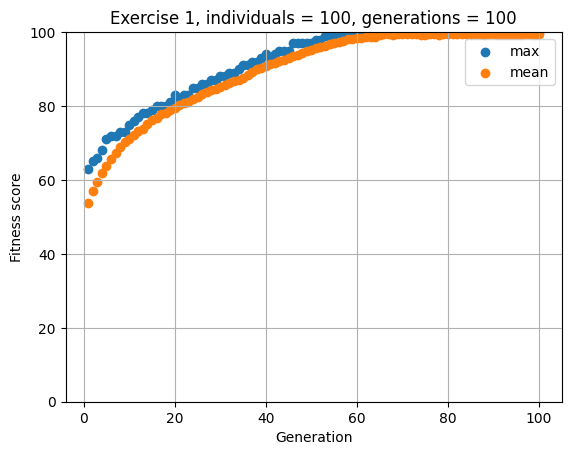

In [38]:
n_pop = 100
n_bits = 100
n_iter = 100
cross_rate = 0.5
mutation_rate = 0.005

# perform the genetic algorithm search
best, score, population_sum, max_scores, mean_scores = genetic_algorithm(onemax, n_bits, n_pop, n_iter, cross_rate, mutation_rate)

print(f'Crossover rate = {cross_rate}')
print(f'Mutation rate = {mutation_rate}')
print(f'Number of individuals = {n_pop}')
print(f'Number of generations = {n_iter}')
print(f'Best individual = {best}')
print(f'Best score = {-1*score}')
print(f'Population sum = {population_sum}')

plt.title(f'Exercise 1, individuals = {n_pop}, generations = {n_iter}')
plt.scatter([x for x in range(1,101)], max_scores, label='max')
plt.scatter([x for x in range(1,101)], mean_scores, label='mean')
plt.legend()
plt.grid()
plt.ylabel('Fitness score')
plt.ylim((0,100))
plt.xlabel('Generation')